In [1]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
import visualkeras

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

#train_path = 'Datasets/train'
#valid_path = 'Datasets/test'

train_path = 'D:/project/CT/train'
valid_path = 'D:/project/CT/test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [5]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('D:/project/CT/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

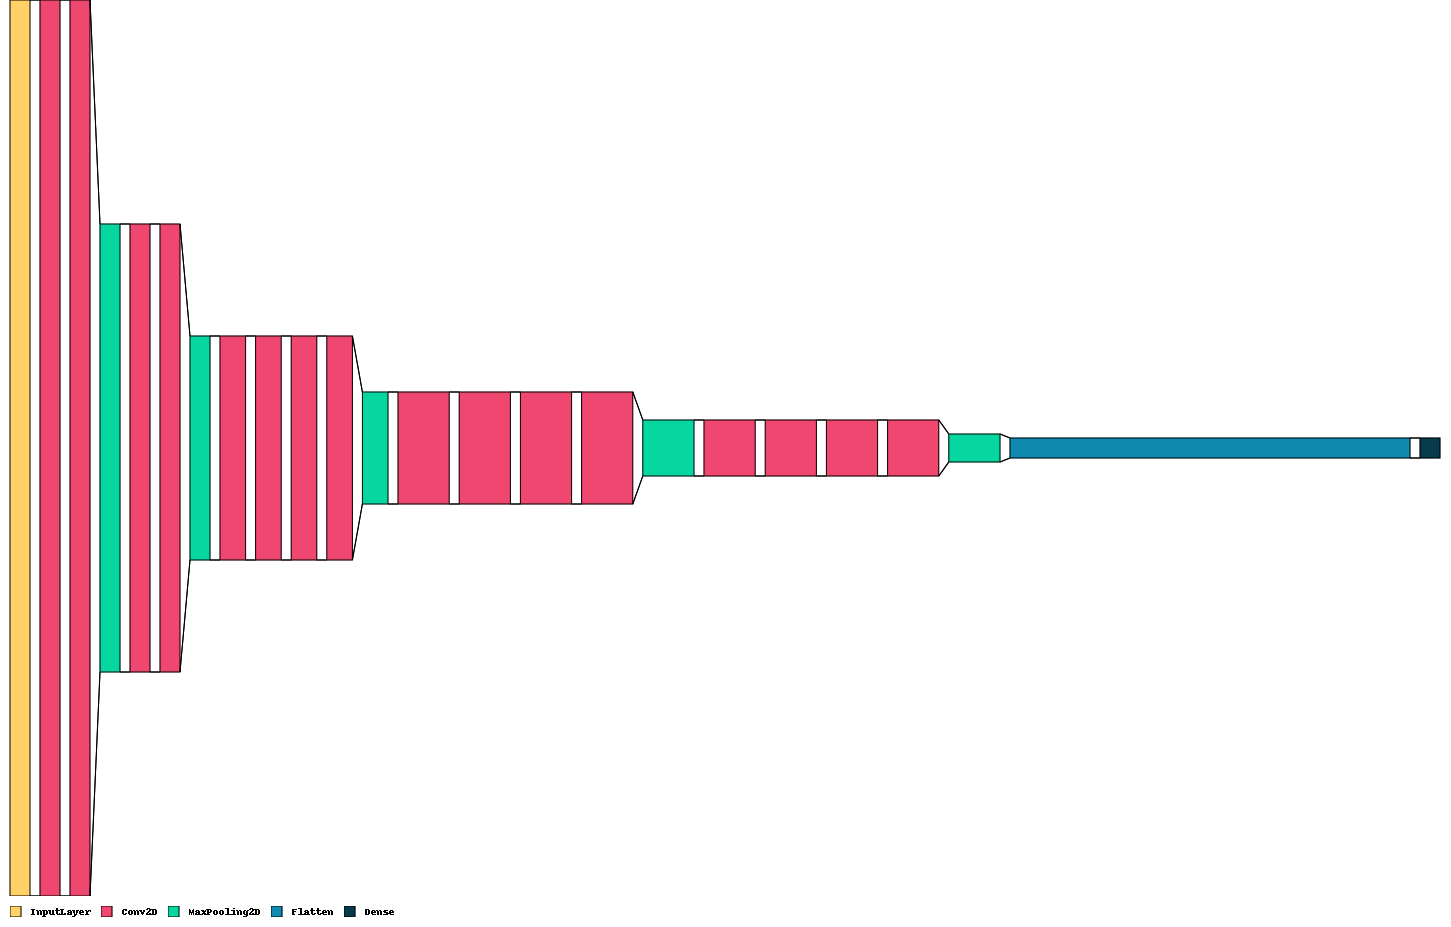

In [10]:
visualkeras.layered_view(model, legend=True, draw_volume=False).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model,legend=True, draw_volume=False)

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=False, show_layer_names=False)

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/project/CT/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5571 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory('D:/project/CT/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2500 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,  
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
175/175 [==============================] - 2786s 16s/step - loss: 0.3145 - accuracy: 0.8776 - val_loss: 0.5438 - val_accuracy: 0.7784
Epoch 2/3
175/175 [==============================] - 4338s 25s/step - loss: 0.1718 - accuracy: 0.9318 - val_loss: 2.1809 - val_accuracy: 0.5404
Epoch 3/3
175/175 [==============================] - 4375s 25s/step - loss: 0.1477 - accuracy: 0.9417 - val_loss: 0.9895 - val_accuracy: 0.7796


In [18]:
#Generate Data to validate with new data 
#non covid set
valid_set=test_datagen.flow_from_directory('D:\project\CT\V Ncov',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 20 images belonging to 1 classes.


In [19]:
import numpy as np
pred=np.round(model.predict(valid_set))
#08 or 1
print(pred)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [20]:
#Generate Data to validate with new data 
#covid set D:/project/CT/val C
valid_set=test_datagen.flow_from_directory('D:/project/CT/val C',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 20 images belonging to 1 classes.


In [21]:
import numpy as np
pred=np.round(model.predict(valid_set))
#08 or 1
print(pred)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [22]:
model.save('model.h5')

In [2]:
#Load model and test for single image: Zero for NORMAL and ONE for PNEUMONIA
from keras.models import load_model
import cv2
import numpy as np

model = load_model('model.h5')

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#img = cv2.imread('D:/project/CT/V Ncov/non-covid/4.png')
img = cv2.imread('D:/project/CT/val C/covid/19.png')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

#y_pred=model.predict(np.expand_dims(img,axis=0))
pred=np.round(model.predict(img))
print(pred)

[[1. 0.]]


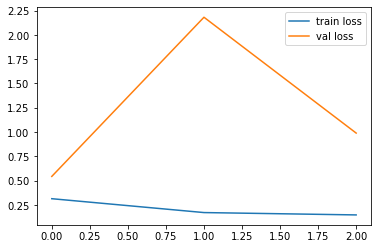

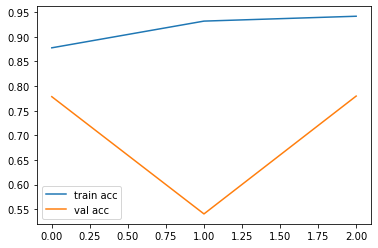

<Figure size 432x288 with 0 Axes>

In [29]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')